# Spectrometer test


In [5]:
# import seabreeze (use 'pyseabreeze')
import seabreeze.spectrometers as sb

import os
import math
import numpy as np
import matplotlib.pyplot as plt
import time

# set graphics to be plotted in the notebook
%matplotlib inline 

devices = sb.list_devices()
print (devices)

[<SeaBreezeDevice STS:S03615>]


In [6]:
#spec = sb.Spectrometer(devices[0])#universal
#spec = sb.Spectrometer.from_serial_number("USB2+F02461")#usb 2000
spec = sb.Spectrometer.from_serial_number("S03615")#STS-UV-L-100-400-SMA

In [7]:
# serial number
print (spec.serial_number)
# model
print (spec.model)
# number of pixels (as returned by seabreeze)
print (spec.pixels)
# set the integration time in microseconds
spec.integration_time_micros(400000)
time.sleep(2)
# return an array containing all wavelengths
#wavelengths=spec.wavelengths()
# return the newest aquired spectrum (with dark count and nonlinearity correction)
#intensities=spec.intensities(correct_dark_counts=True, correct_nonlinearity=True)

S03615
STS
1024


1024
1024


3357.0

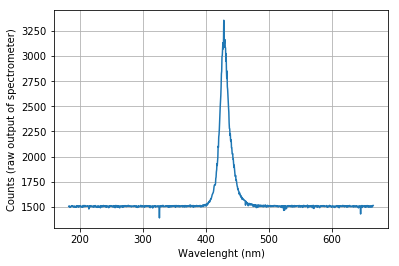

In [9]:
wavelengths, intensities = spec.spectrum()
print (len(wavelengths))
print (len(intensities))
plt.plot(wavelengths,intensities)
plt.xlabel ("Wavelenght (nm)")
plt.ylabel("Counts (raw output of spectrometer)")
plt.grid()
np.max(intensities)
#plt.savefig('tree100ms6.tiff')

In [10]:
print (wavelengths[np.argmax(intensities)])

428.63396134338274


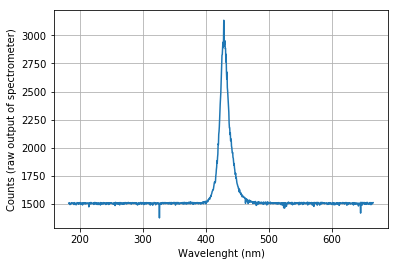

In [11]:
#get blue 430nm led spectrum
blue_430nm_400ms=intensities
blue_430nm_400ms=[]
for ii in range(10):
    wavelengths, intensities = spec.spectrum()
    blue_430nm_400ms.append(intensities)
    time.sleep(2)
blue_430nm_400ms=np.asarray(blue_430nm_400ms)
mean_blue_430nm_400ms=np.mean(blue_430nm_400ms,axis=0)
plt.plot(wavelengths,mean_blue_430nm_400ms)
plt.xlabel ("Wavelenght (nm)")
plt.ylabel("Counts (raw output of spectrometer)")
plt.grid()

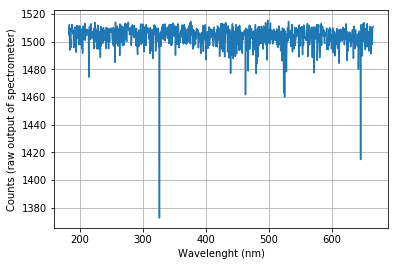

In [12]:
#get dark noise
dark_400ms_10=[]
for ii in range(10):
    wavelengths, intensities = spec.spectrum()
    dark_400ms_10.append(intensities)
    time.sleep(2)
dark_400ms_10=np.asarray(dark_400ms_10)
mean_dark_400ms_newDev2=np.mean(dark_400ms_10,axis=0)
plt.plot(wavelengths,mean_dark_400ms_newDev2)
plt.xlabel ("Wavelenght (nm)")
plt.ylabel("Counts (raw output of spectrometer)")
plt.grid()

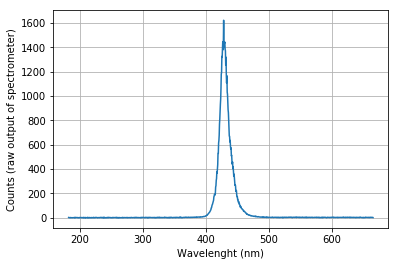

In [13]:
#blue 430nm 400ms exclude dark noise
blue_430nm_400ms_no_dark_noise=mean_blue_430nm_400ms-mean_dark_400ms_newDev2
plt.plot(wavelengths,blue_430nm_400ms_no_dark_noise)
plt.xlabel ("Wavelenght (nm)")
plt.ylabel("Counts (raw output of spectrometer)")
plt.grid()

In [14]:
wavelengths[np.argmax(blue_430nm_400ms_no_dark_noise)]

428.63396134338274

In [15]:
read_dictionary = np.load('my_dict_calib_STSUV_new2.npy').item()
print(read_dictionary.items())

dict_items([('wavelengths_UV', array([184.19993591, 184.64745936, 185.09503173, ..., 665.4173081 ,
       665.91130764, 666.40534928])), ('dark_10ms', array([1502., 1504., 1501., ..., 1498., 1501., 1505.])), ('400nm_06uW_400ms', array([1505., 1509., 1516., ..., 1512., 1499., 1506.])), ('400nm_06uW_1_400ms', array([1507., 1511., 1516., ..., 1510., 1501., 1503.])), ('400nm_06uW_2_400ms', array([1507., 1512., 1511., ..., 1510., 1502., 1504.])), ('400nm_06uW_3_400ms', array([1505., 1511., 1515., ..., 1514., 1500., 1504.])), ('400nm_06uW_4_400ms', array([1509., 1506., 1514., ..., 1515., 1499., 1503.])), ('400nm_06uW_5_400ms', array([1509., 1513., 1518., ..., 1514., 1500., 1507.])), ('400nm_02uW_1_400ms', array([1503., 1510., 1516., ..., 1515., 1499., 1504.])), ('400nm_02uW_2_400ms', array([1509., 1513., 1515., ..., 1511., 1498., 1504.])), ('400nm_02uW_3_400ms', array([1506., 1511., 1518., ..., 1512., 1504., 1508.])), ('400nm_02uW_4_400ms', array([1509., 1509., 1511., ..., 1515., 1502., 1505

In [16]:
#add new data for new device and save in new file
read_dictionary['blue_430nm_400ms_no_dark_noise']=blue_430nm_400ms_no_dark_noise
#np.save('my_dict_calib_STSUV_new2.npy', read_dictionary) 

Text(0,0.5,'Counts (raw output of spectrometer)')

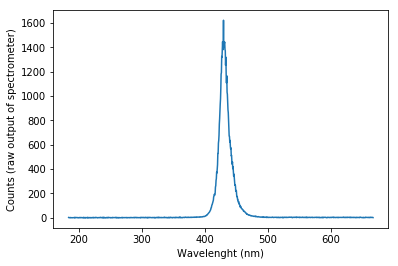

In [17]:
read_dictionary = np.load('my_dict_calib_STSUV_new2.npy').item()
plt.plot(read_dictionary['wavelengths_UV'],read_dictionary['blue_430nm_400ms_no_dark_noise'])
plt.xlabel ("Wavelenght (nm)")
plt.ylabel("Counts (raw output of spectrometer)")